In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For scaling data, which you need to do for KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Data Science/PandasForDataManipulation/clean_sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Product ID,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Store ID,Year Opened,Area of Store,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store 2,Size of Store
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,2.0,Medium
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,2.0,Medium
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,2.0,Medium
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,2.0,Medium
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1.0,High


In [4]:
df.drop(df.columns[[0,1,7,8,9,12]], axis=1, inplace=True)

In [5]:
df.rename(columns={'Size of Store 2': 'Size of Store'}, inplace=True)

In [6]:
df.head()

,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Supermarket Type1,3735.1380,Medium
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Supermarket Type2,443.4228,Medium
2,17.50,Low Fat,0.016760,Meat,141.6180,Supermarket Type1,2097.2700,Medium
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Grocery Store,732.3800,Medium
4,8.93,Low Fat,0.000000,Household,53.8614,Supermarket Type1,994.7052,High


In [7]:
df['Low Fat or Regular'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df['Low Fat or Regular']=df['Low Fat or Regular'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [9]:
df['Low Fat or Regular'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [10]:
df['Grocery Store or Supermarket'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [11]:
df['Grocery Store or Supermarket'].replace({'Supermarket Type1' : 'Supermarket','Supermarket Type2': 'Supermarket','Supermarket Type3': 'Supermarket'},inplace=True)

In [12]:
df['Grocery Store or Supermarket'].unique()

array(['Supermarket', 'Grocery Store'], dtype=object)

In [13]:
df['Product Category'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
X = df[['Product List Price', 'Product Category','Size of Store']]

In [15]:
y = df[['Item_Outlet_Sales']]

In [16]:
X = pd.get_dummies(data=X, drop_first=True)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [18]:
knn = KNeighborsRegressor(n_neighbors=50)

In [19]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [20]:
predictions=knn.predict(X_test)

In [21]:
score=knn.score(X_train,y_train)

In [22]:
print(score)
print(f"The avg R^2 is {score.mean()*100:.2f}%")

0.3460704745917841
The avg R^2 is 34.61%


In [23]:
k_range = range(1,31)
k_score = []
for k_number in k_range:
    knn = KNeighborsRegressor(n_neighbors=k_number)
    knn.fit(X,y)
    predictions = knn.predict(X)
    score = knn.score(X,y)
    k_score.append(score.mean())

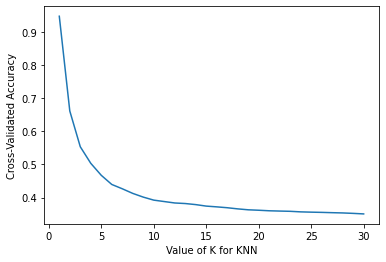

In [24]:
plt.plot(k_range,k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');